In [1]:
!pip install pandas

In [2]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:

import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder


In [5]:
data = pd.read_csv('george_wassouf_lyrics_dataset.csv')
data.head()

,Track Title,Track Lyrics,Release year,Composer,Lyricist
0,Aah Habaieb - آه حبايب,اه حبايب بس فين الحب غايب\nوليه يا قلبي ما لك...,1995,صلاح الشرنوبي,وليد رزيقه
1,Aalem Albi El Shok - علم قلبي الشوق,\nيا ليلي يا ليلي يا ليل\n\nعلم قلبي الشوق الش...,2008,صلاح الشرنوبي,احمد شتا
2,Addi Eli Kanou - أدي اللي كانوا,أدي اللي كانوا يا هوا أقرب ما لينا\nواللي ما ...,2008,امجد العاطفي,احمد سامي
3,Alb Al Asheq Daleiloh - قلب العاشق دليله,قلب العاشق دليله\nقلب العاشق دليله\n\nقلب العا...,2002,امجد العاطفي,عوض بدوي
4,Al Forqah Saabah - الفرقة صعبة,مش قادر اصبرعغيابا\nكل ليله بجمع دموعي\nو بسهر...,2009,جورج يزبك,توفيق بركات


In [6]:
# Number of songs
no_of_songs = data.shape[0]
print(no_of_songs)
# Number of attributes
no_of_attributes = data.shape[1]
print(no_of_attributes)
# Attribute names
attrs = data.columns.tolist()
print(attrs)

78
5
['Track Title', 'Track Lyrics', 'Release year', 'Composer', 'Lyricist']


In [7]:
track_lyrics_df = data['Track Lyrics'].to_frame()
print(track_lyrics_df.head())

                                        Track Lyrics
0   اه حبايب بس فين الحب غايب\nوليه يا قلبي ما لك...
1  \nيا ليلي يا ليلي يا ليل\n\nعلم قلبي الشوق الش...
2   أدي اللي كانوا يا هوا أقرب ما لينا\nواللي ما ...
3  قلب العاشق دليله\nقلب العاشق دليله\n\nقلب العا...
4  مش قادر اصبرعغيابا\nكل ليله بجمع دموعي\nو بسهر...


In [8]:
data['Track Lyrics'] = data['Track Lyrics'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
data.head()

,Track Title,Track Lyrics,Release year,Composer,Lyricist
0,Aah Habaieb - آه حبايب,اه حبايب بس فين الحب غايب\nوليه يا قلبي ما لك...,1995,صلاح الشرنوبي,وليد رزيقه
1,Aalem Albi El Shok - علم قلبي الشوق,\nيا ليلي يا ليلي يا ليل\n\nعلم قلبي الشوق الش...,2008,صلاح الشرنوبي,احمد شتا
2,Addi Eli Kanou - أدي اللي كانوا,أدي اللي كانوا يا هوا أقرب ما لينا\nواللي ما ...,2008,امجد العاطفي,احمد سامي
3,Alb Al Asheq Daleiloh - قلب العاشق دليله,قلب العاشق دليله\nقلب العاشق دليله\n\nقلب العا...,2002,امجد العاطفي,عوض بدوي
4,Al Forqah Saabah - الفرقة صعبة,مش قادر اصبرعغيابا\nكل ليله بجمع دموعي\nو بسهر...,2009,جورج يزبك,توفيق بركات


In [9]:
data['Track Title'] = data['Track Title'].apply(lambda x: re.sub(r'[-A-Za-z]', '', x))
data.head()

,Track Title,Track Lyrics,Release year,Composer,Lyricist
0,آه حبايب,اه حبايب بس فين الحب غايب\nوليه يا قلبي ما لك...,1995,صلاح الشرنوبي,وليد رزيقه
1,علم قلبي الشوق,\nيا ليلي يا ليلي يا ليل\n\nعلم قلبي الشوق الش...,2008,صلاح الشرنوبي,احمد شتا
2,أدي اللي كانوا,أدي اللي كانوا يا هوا أقرب ما لينا\nواللي ما ...,2008,امجد العاطفي,احمد سامي
3,قلب العاشق دليله,قلب العاشق دليله\nقلب العاشق دليله\n\nقلب العا...,2002,امجد العاطفي,عوض بدوي
4,الفرقة صعبة,مش قادر اصبرعغيابا\nكل ليله بجمع دموعي\nو بسهر...,2009,جورج يزبك,توفيق بركات


In [10]:
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

def remove_newline_chars(text):
    return text.replace('\n', ' ').replace('\r', '')

def remove_diacritics(text):
    arabic_diacritics = re.compile("""
                                ّ    | # Tashdid
                               ~    | # Shada 
                                َ    | # Fatha
                                ً    | # Tanwin Fath
                                ُ    | # Damma
                                ٌ    | # Tanwin Damm
                                ِ    | # Kasra
                                ٍ    | # Tanwin Kasr
                                ْ    | # Sukun
                                ـ     # Tatwil/Kashida
                            """, re.VERBOSE)
    return re.sub(arabic_diacritics, '', text)

data['Track Lyrics'] = data['Track Lyrics'].apply(remove_punctuation)
data['Track Lyrics'] = data['Track Lyrics'].apply(remove_newline_chars)
data['Track Lyrics'] = data['Track Lyrics'].apply(remove_diacritics)
data['Track Title'] = data['Track Title'].apply(remove_punctuation)
data['Track Title'] = data['Track Title'].apply(remove_newline_chars)
data['Track Title'] = data['Track Title'].apply(remove_diacritics)

data.head()

,Track Title,Track Lyrics,Release year,Composer,Lyricist
0,آه حبايب,اه حبايب بس فين الحب غايب وليه يا قلبي ما لكش...,1995,صلاح الشرنوبي,وليد رزيقه
1,علم قلبي الشوق,يا ليلي يا ليلي يا ليل علم قلبي الشوق الشوق ...,2008,صلاح الشرنوبي,احمد شتا
2,أدي اللي كانوا,أدي اللي كانوا يا هوا أقرب ما لينا واللي ما ه...,2008,امجد العاطفي,احمد سامي
3,قلب العاشق دليله,قلب العاشق دليله قلب العاشق دليله قلب العاشق ...,2002,امجد العاطفي,عوض بدوي
4,الفرقة صعبة,مش قادر اصبرعغيابا كل ليله بجمع دموعي و بسهر م...,2009,جورج يزبك,توفيق بركات


In [11]:
def standardizing_arabic_text(text):
    text = re.sub(r'ي\b', 'ى', text)
    text = text.replace('أ', 'ا')
    text = text.replace('آ', 'ا')
    text = re.sub(r'\bإ', 'ا', text)
    text = re.sub(r'ة\b', 'ه', text)
    return text

data['Track Lyrics'] = data['Track Lyrics'].apply(standardizing_arabic_text)
data['Track Title'] = data['Track Title'].apply(standardizing_arabic_text)
data.head()

,Track Title,Track Lyrics,Release year,Composer,Lyricist
0,اه حبايب,اه حبايب بس فين الحب غايب وليه يا قلبى ما لكش...,1995,صلاح الشرنوبي,وليد رزيقه
1,علم قلبى الشوق,يا ليلى يا ليلى يا ليل علم قلبى الشوق الشوق ...,2008,صلاح الشرنوبي,احمد شتا
2,ادى اللى كانوا,ادى اللى كانوا يا هوا اقرب ما لينا واللى ما ه...,2008,امجد العاطفي,احمد سامي
3,قلب العاشق دليله,قلب العاشق دليله قلب العاشق دليله قلب العاشق ...,2002,امجد العاطفي,عوض بدوي
4,الفرقه صعبه,مش قادر اصبرعغيابا كل ليله بجمع دموعى و بسهر م...,2009,جورج يزبك,توفيق بركات


In [12]:
total_words_before = data['Track Lyrics'].apply(lambda x: len(x.split())).sum()
print(f'Total number of words before removing stopwords: {total_words_before}')

Total number of words before removing stopwords: 31921


In [13]:
words_before = data['Track Lyrics'].apply(lambda x: x.split()).explode()

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yyomn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stop_words = set(stopwords.words('arabic'))
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

data['Track Lyrics'] = data['Track Lyrics'].apply(remove_stopwords)
data['Track Title'] = data['Track Title'].apply(remove_stopwords)
data.head()

,Track Title,Track Lyrics,Release year,Composer,Lyricist
0,اه حبايب,اه حبايب فين الحب غايب وليه قلبى لكش نايب شافو...,1995,صلاح الشرنوبي,وليد رزيقه
1,قلبى الشوق,ليلى ليلى ليل قلبى الشوق الشوق عينى السهر خدنى...,2008,صلاح الشرنوبي,احمد شتا
2,ادى اللى كانوا,ادى اللى كانوا هوا اقرب لينا واللى هانوا هوا ف...,2008,امجد العاطفي,احمد سامي
3,قلب العاشق دليله,قلب العاشق دليله قلب العاشق دليله قلب العاشق د...,2002,امجد العاطفي,عوض بدوي
4,الفرقه صعبه,مش قادر اصبرعغيابا ليله بجمع دموعى بسهر دمعات ...,2009,جورج يزبك,توفيق بركات


In [16]:
total_words_after = data['Track Lyrics'].apply(lambda x: len(x.split())).sum()
print(f'Total number of words after removing stopwords: {total_words_after}')

Total number of words after removing stopwords: 26588


In [17]:
words_after = data['Track Lyrics'].apply(lambda x: x.split()).explode()

In [18]:
eliminated_words = words_before[~words_before.isin(words_after)]
print(f'Total number of eliminated words: {len(eliminated_words)}')
print(f'Eliminated words: {eliminated_words.tolist()}')

Total number of eliminated words: 5333
Eliminated words: ['بس', 'يا', 'ما', 'بس', 'يا', 'يا', 'ما', 'ما', 'ما', 'بس', 'يا', 'يا', 'يا', 'كان', 'حبيب', 'بس', 'بس', 'يا', 'ما', 'بس', 'يا', 'يا', 'ما', 'ما', 'ما', 'بس', 'يا', 'يا', 'يا', 'كان', 'حبيب', 'بس', 'يا', 'يا', 'يا', 'علم', 'علم', 'ع', 'علم', 'علم', 'ع', 'ما', 'علم', 'علم', 'ع', 'يا', 'يا', 'يا', 'يا', 'ما', 'علم', 'علم', 'ع', 'يا', 'قد', 'فوق', 'ما', 'ما', 'قد', 'فوق', 'ما', 'ما', 'ما', 'علم', 'علم', 'ع', 'يا', 'يا', 'يا', 'علم', 'علم', 'ع', 'علم', 'علم', 'ع', 'ما', 'علم', 'علم', 'ع', 'يا', 'يا', 'يا', 'يا', 'ما', 'علم', 'علم', 'ع', 'يا', 'قد', 'فوق', 'ما', 'ما', 'قد', 'فوق', 'ما', 'ما', 'ما', 'علم', 'علم', 'ع', 'يا', 'ما', 'ما', 'يا', 'يا', 'ما', 'ما', 'يا', 'يا', 'يا', 'يا', 'ما', 'ما', 'يا', 'قبل', 'ما', 'على', 'كل', 'قبل', 'ما', 'على', 'كل', 'يا', 'ما', 'ما', 'ما', 'يا', 'يا', 'من', 'غير', 'كان', 'على', 'يا', 'من', 'غير', 'كان', 'على', 'يا', 'يا', 'ما', 'ما', 'ما', 'يا', 'يا', 'ما', 'ما', 'يا', 'يا', 'يا', 'ما', 'ما', 'يا', 

In [19]:
# Tokenize and join with newline characters
data['Tokenized & Preprocessed Lyrics'] = data['Track Lyrics'].apply(lambda x: x.split())
data['Tokenized & Preprocessed Lyrics'] = data['Tokenized & Preprocessed Lyrics'].apply(lambda x: '\n'.join(x))

# Display the result
print(data[['Track Title', 'Track Lyrics', 'Tokenized & Preprocessed Lyrics']].head())

# Save with UTF-8-SIG encoding
data.to_csv('george_wassouf_lyrics_tokenized.csv', index=False, encoding='utf-8-sig')

        Track Title                                       Track Lyrics  \
0          اه حبايب  اه حبايب فين الحب غايب وليه قلبى لكش نايب شافو...   
1        قلبى الشوق  ليلى ليلى ليل قلبى الشوق الشوق عينى السهر خدنى...   
2    ادى اللى كانوا  ادى اللى كانوا هوا اقرب لينا واللى هانوا هوا ف...   
3  قلب العاشق دليله  قلب العاشق دليله قلب العاشق دليله قلب العاشق د...   
4       الفرقه صعبه  مش قادر اصبرعغيابا ليله بجمع دموعى بسهر دمعات ...   

                     Tokenized & Preprocessed Lyrics  
0  اه\nحبايب\nفين\nالحب\nغايب\nوليه\nقلبى\nلكش\nن...  
1  ليلى\nليلى\nليل\nقلبى\nالشوق\nالشوق\nعينى\nالس...  
2  ادى\nاللى\nكانوا\nهوا\nاقرب\nلينا\nواللى\nهانو...  
3  قلب\nالعاشق\nدليله\nقلب\nالعاشق\nدليله\nقلب\nا...  
4  مش\nقادر\nاصبرعغيابا\nليله\nبجمع\nدموعى\nبسهر\...  


In [20]:
print("Total number of songs in the dataset:", no_of_songs)
print("Total number of composers:", data['Composer'].nunique())
print("Total number of lyricists:", data['Lyricist'].nunique())

Total number of songs in the dataset: 78
Total number of composers: 17
Total number of lyricists: 34


Initial invistigation for keywords

In [21]:

# Define the keyword
keyword = "طبيب"
filtered_songs = data[data['Tokenized & Preprocessed Lyrics'].str.contains(keyword, na=False, regex=True)]

# Display the result
print(filtered_songs['Track Title'])


21    الزمن دوار
44          عاشق
71     طبيب جراح
Name: Track Title, dtype: object


In [22]:
# Define the keyword
keyword = "حب"

# Filter songs containing the keyword
filtered_songs = data[data['Tokenized & Preprocessed Lyrics'].str.contains(keyword, na=False, regex=True)].copy()

# Add a column to count occurrences of the keyword in each song
filtered_songs.loc[:, 'Keyword Occurrences'] = filtered_songs['Tokenized & Preprocessed Lyrics'].str.count(keyword)

# Display the result
print(filtered_songs[['Track Title', 'Keyword Occurrences']])

         Track Title  Keyword Occurrences
0           اه حبايب                   24
1         قلبى الشوق                    8
2     ادى اللى كانوا                   12
3   قلب العاشق دليله                   10
4        الفرقه صعبه                   12
..               ...                  ...
73        ياه عالزمن                    8
74        نجوم الليل                   16
75        يوم الوادع                   24
76       زمن العجايب                   18
77            ذكريات                   12

[66 rows x 2 columns]


# Studying word frequency


In [23]:

# Group by 'Song' and calculate the number of words
data['num_words'] = data.groupby('Track Title')['Track Lyrics'].transform(lambda x: x.str.split().str.len().sum())

# Select relevant columns, drop duplicates, and sort by 'num_words' in descending order
full_word_count = (
    data[['Track Title', 'num_words', 'Release year', 'Composer', 'Lyricist']]
    .drop_duplicates()
    .sort_values(by='num_words', ascending=False)
)

In [24]:
# Select the topmost songs with the highest word count
topmost = 10
test_sample = (
    full_word_count.head(topmost)
    .assign(
        num_words=lambda df: df['num_words'].apply(lambda x: f"<div style='background-color:lightblue'>{x}</div>"),
        Song=lambda df: df['Track Title'].apply(lambda x: f"<div style='background-color:lightpink'>{x}</div>")
    )
)

# Convert the DataFrame to an HTML table
from tabulate import tabulate
html_table = tabulate(
    test_sample,
    headers="keys",
    tablefmt="html",
    showindex=False
)

# Display the HTML table
from IPython.core.display import display, HTML
display(HTML(html_table))

C:\Users\yyomn\AppData\Local\Temp\ipykernel_11224\1332261390.py:21: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Track Title,num_words,Release year,Composer,Lyricist,Song
سهرت الليل,<div style='background-color:lightblue'>992</div>,2004,رياض البندك,رياض البندك,<div style='background-color:lightpink'>سهرت الليل</div>
صياد الطيور,<div style='background-color:lightblue'>755</div>,1993,شاكر الموجي,احمد فواد نجم,<div style='background-color:lightpink'>صياد الطيور</div>
كده كفايه,<div style='background-color:lightblue'>696</div>,2000,امجد العاطفي,بهاء الدين محمد,<div style='background-color:lightpink'>كده كفايه</div>
سلف ودين,<div style='background-color:lightblue'>672</div>,2003,امجد العاطفي,عبير الرزاز,<div style='background-color:lightpink'>سلف ودين</div>
لسه الدنيا بخير,<div style='background-color:lightblue'>640</div>,1996,صلاح الشرنوبي,احمد شتا,<div style='background-color:lightpink'>لسه الدنيا بخير</div>
يوم الوادع,<div style='background-color:lightblue'>612</div>,2001,امجد العاطفي,عوض بدوي,<div style='background-color:lightpink'>يوم الوادع</div>
انا اسف,<div style='background-color:lightblue'>600</div>,1999,امجد العاطفي,عوض بدوي,<div style='background-color:lightpink'>انا اسف</div>
بنفكر بالناس,<div style='background-color:lightblue'>582</div>,2003,امجد العاطفي,فوزي ابراهيم,<div style='background-color:lightpink'>بنفكر بالناس</div>
اسكت,<div style='background-color:lightblue'>575</div>,2003,شاكر الموجي,نبيل افيوني,<div style='background-color:lightpink'>اسكت</div>
طبيب جراح,<div style='background-color:lightblue'>574</div>,1999,شاكر الموجي,صفوح شغاله,<div style='background-color:lightpink'>طبيب جراح</div>


Studying word count distribution

In [25]:
# Calculate lyrics length distribution
lyrics_len_dist = (
    data[['Track Title', 'Tokenized & Preprocessed Lyrics']]
    .assign(Word=lambda df: df['Tokenized & Preprocessed Lyrics'].str.split())
    .explode('Word')
    .groupby('Track Title')
    .size()
    .reset_index(name='num_words')
    .drop_duplicates()
)

# Display the result
print(lyrics_len_dist.head())

      Track Title  num_words
0    7 صاحى الليل        392
1     اتاخرت كتير        332
2  ادى اللى كانوا        414
3    ارضى بالنصيب        160
4            اسكت        575


In [26]:
import numpy as np
from scipy.stats import gaussian_kde

# Function to estimate the mode
def estimate_mode(x):
    density = gaussian_kde(x)
    xs = np.linspace(min(x), max(x), 1000)
    mode = xs[np.argmax(density(xs))]
    return mode

# Calculate mean, median, and mode
mean_count = lyrics_len_dist['num_words'].mean()
median_count = lyrics_len_dist['num_words'].median()
mode_count = estimate_mode(lyrics_len_dist['num_words'])

# Display the results
print(f"Mean: {mean_count}, Median: {median_count}, Mode: {mode_count}")

Mean: 340.87179487179486, Median: 294.0, Mode: 231.73373373373374


Estimation using right skewed normal dist

In [27]:
from scipy.stats import skewnorm

# Fit a skewed normal distribution to the data
param_dist = skewnorm.fit(lyrics_len_dist['num_words'])

# Display the fitted parameters
print(f"Fitted parameters: {param_dist}")

Fitted parameters: (204208556.7265914, 122.99999310416382, 276.72732580892557)


Note: you may need to restart the kernel to use updated packages.


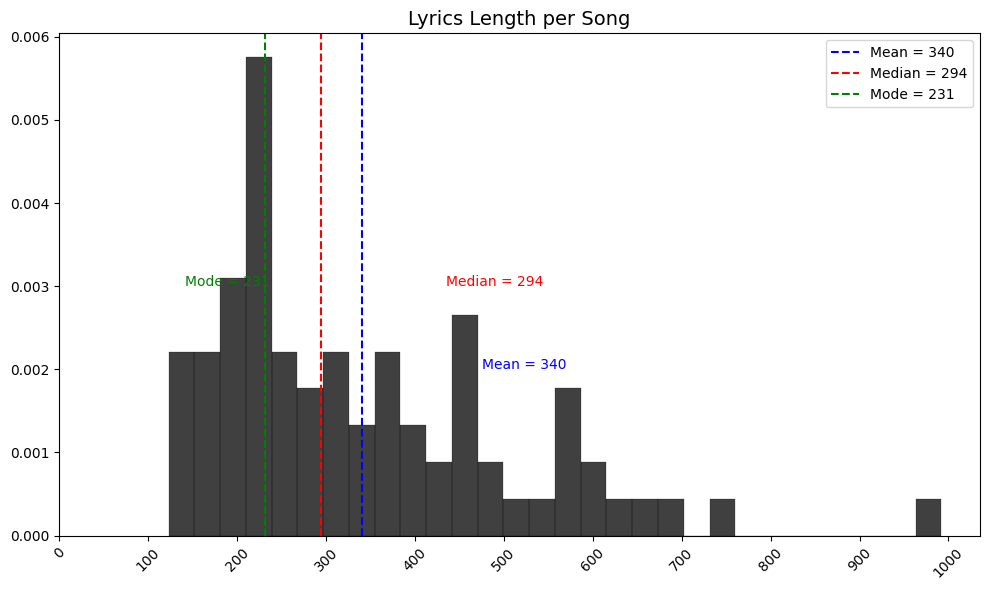

In [28]:

%pip install seaborn --user
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create the plot
plt.figure(figsize=(10, 6))

# Histogram for num_words
sns.histplot(
    lyrics_len_dist['num_words'], 
    stat="density", 
    bins=30, 
    color="black", 
    edgecolor="black", 
    linewidth=0.15
)

# Add vertical lines for mean, median, and mode
plt.axvline(mean_count, color="blue", linestyle="dashed", label=f"Mean = {int(mean_count)}")
plt.axvline(median_count, color="red", linestyle="dashed", label=f"Median = {int(median_count)}")
plt.axvline(mode_count, color="green", linestyle="dashed", label=f"Mode = {int(mode_count)}")

# Add text annotations for mean, median, and mode
plt.text(mean_count + 230, 0.002, f"Mean = {int(mean_count)}", color="blue", fontsize=10, ha="right")
plt.text(median_count + 250, 0.003, f"Median = {int(median_count)}", color="red", fontsize=10, ha="right")
plt.text(mode_count + 5, 0.003, f"Mode = {int(mode_count)}", color="green", fontsize=10, ha="right")

# Customize the plot
plt.title("Lyrics Length per Song", fontsize=14, ha="center")
plt.xlabel("")
plt.ylabel("")
plt.xticks(np.arange(0, lyrics_len_dist['num_words'].max() + 100, 100), rotation=45)
plt.grid(False)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

This shows that the average lyrics length per song is:  340

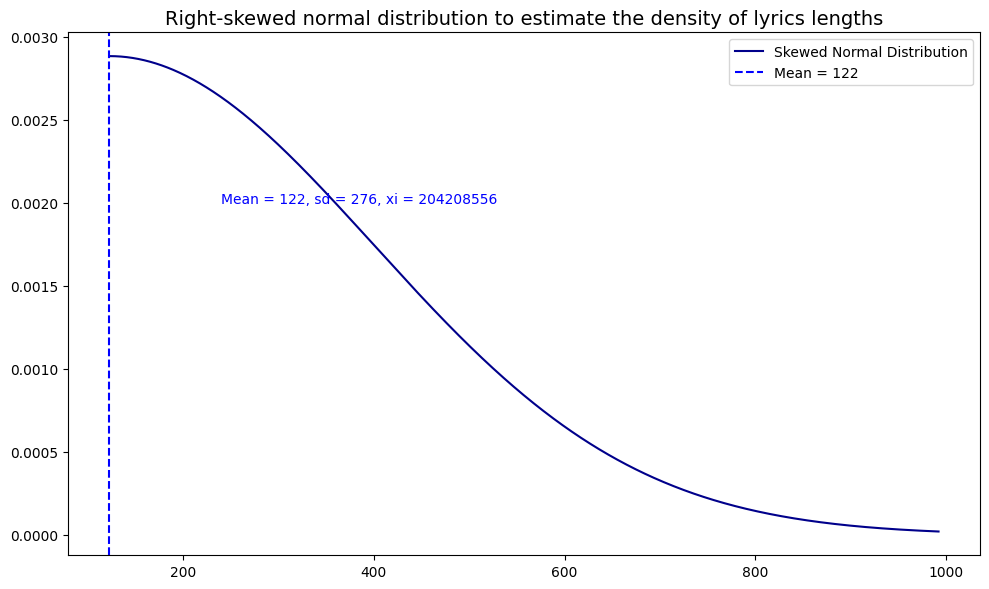

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skewnorm

# Generate x values for the distribution
x = np.linspace(lyrics_len_dist['num_words'].min(), lyrics_len_dist['num_words'].max(), 1000)

# Extract parameters from the fitted distribution
shape, loc, scale = param_dist

# Calculate the skewed normal density
y = skewnorm.pdf(x, shape, loc, scale)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, color="darkblue", label="Skewed Normal Distribution")

# Add a vertical line for the mean
mean_value = loc
plt.axvline(mean_value, color="blue", linestyle="dashed", label=f"Mean = {int(mean_value)}")

# Add text annotation for the parameters
plt.text(
    530, 0.002, 
    f"Mean = {int(mean_value)}, sd = {int(scale)}, xi = {int(shape)}", 
    color="blue", fontsize=10, ha="right"
)

# Customize the plot
plt.title("Right-skewed normal distribution to estimate the density of lyrics lengths", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

Studying word count per decade

In [30]:
# Add a 'Decade' column based on the release year
data['Decade'] = (data['Release year'] // 10) * 10

# Calculate word count per song grouped by decade
full_word_count_decade = (
    data[['Track Title', 'Decade', 'Track Lyrics']]
    .assign(Word=lambda df: df['Track Lyrics'].str.split())
    .explode('Word')
    .groupby(['Decade', 'Track Title'])
    .size()
    .reset_index(name='num_words')
    .drop_duplicates()
)

# Display the result
print(full_word_count_decade.head())

   Decade    Track Title  num_words
0    1980    الهوى سلطان        460
1    1980      حلف القمر        378
2    1980      روحى نسمه        574
3    1990   ارضى بالنصيب        160
4    1990  الكلمه الطيبه        211


In [31]:
# Ensure 'Decade' column is of string type
full_word_count_decade['Decade'] = full_word_count_decade['Decade'].astype(str)

# Convert 'Decade' to numeric and create a 'years' column
full_word_count_decade['years'] = full_word_count_decade['Decade'].str.extract(r'(\d+)').astype(int)

# Create a 'part' column based on whether 'Decade' contains "Early"
full_word_count_decade['part'] = full_word_count_decade['Decade'].str.contains("Early").astype(int)

In [32]:
# Sort by 'years' and 'part'
full_word_count_decade = full_word_count_decade.sort_values(by=['years', 'part'])

# Add a new column 'Song_c' with a constant value of 1
full_word_count_decade['Song_c'] = 1

In [33]:
%pip install plotly --user

Note: you may need to restart the kernel to use updated packages.


In [60]:


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

# Convert 'Decade' to a categorical type with specific order
decade_order = [
    "Late 1940s", "Early 1950s", "Late 1950s", "Early 1960s", "Late 1960s",
    "Early 1970s", "Late 1970s", "Early 1980s", "Late 1980s"
]
full_word_count_decade['Decade'] = pd.Categorical(full_word_count_decade['Decade'], categories=decade_order, ordered=True)

# Convert to an interactive plot using Plotly
fig = px.histogram(
    full_word_count_decade, 
    x="num_words", 
    facet_col="Decade", 
    facet_col_wrap=3, 
    color="Song_c", 
    nbins=30, 
    title="Evolution of Song Length Across Decades"
)
fig.update_layout(
    xaxis_title=None, 
    yaxis_title="Song Count", 
    title_x=0.5, 
    showlegend=False
)
fig.show()

## POS

In [ ]:
%pip install camel-tools
import camel_tools

In [53]:

from camel_tools.disambig.mle import MLEDisambiguator
from camel_tools.tagger.default import DefaultTagger

In [54]:
py_songs = pd.read_csv("george_wassouf_lyrics_tokenized.csv", sep=',', encoding='utf-8')
# Empty fields are replaced by NA.
py_songs=py_songs.fillna("NA")
py_songs.head()

,Track Title,Track Lyrics,Release year,Composer,Lyricist,Tokenized & Preprocessed Lyrics
0,اه حبايب,اه حبايب فين الحب غايب وليه قلبى لكش نايب شافو...,1995,صلاح الشرنوبي,وليد رزيقه,اه\nحبايب\nفين\nالحب\nغايب\nوليه\nقلبى\nلكش\nن...
1,قلبى الشوق,ليلى ليلى ليل قلبى الشوق الشوق عينى السهر خدنى...,2008,صلاح الشرنوبي,احمد شتا,ليلى\nليلى\nليل\nقلبى\nالشوق\nالشوق\nعينى\nالس...
2,ادى اللى كانوا,ادى اللى كانوا هوا اقرب لينا واللى هانوا هوا ف...,2008,امجد العاطفي,احمد سامي,ادى\nاللى\nكانوا\nهوا\nاقرب\nلينا\nواللى\nهانو...
3,قلب العاشق دليله,قلب العاشق دليله قلب العاشق دليله قلب العاشق د...,2002,امجد العاطفي,عوض بدوي,قلب\nالعاشق\nدليله\nقلب\nالعاشق\nدليله\nقلب\nا...
4,الفرقه صعبه,مش قادر اصبرعغيابا ليله بجمع دموعى بسهر دمعات ...,2009,جورج يزبك,توفيق بركات,مش\nقادر\nاصبرعغيابا\nليله\nبجمع\nدموعى\nبسهر\...


In [ ]:

# Initialize the MLEDisambiguator and DefaultTagger
mled = MLEDisambiguator.pretrained()
tagger = DefaultTagger(mled, 'pos')

# Apply POS tagging
py_songs["POS Tags"] = [tagger.tag(ly.split()) for ly in py_songs["Track Lyrics"]]
py_songs["POS Tags"] = py_songs["POS Tags"].apply(lambda x: [tag[1] for tag in x])

## LLMs

## Imports

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm

## Load the dataset


In [ ]:
print("Loading dataset: george_wassouf_lyrics_tokenized.csv")
try:
    data = pd.read_csv('george_wassouf_lyrics_tokenized.csv')
    print(f"Dataset loaded successfully. Total songs: {len(data)}")
except FileNotFoundError:
    print("Error: Dataset file 'george_wassouf_lyrics_tokenized.csv' not found.")
    raise

Loading dataset: george_wassouf_lyrics_dataset.csv
Dataset loaded successfully. Total songs: 78


## Initialize the Hugging Face sentiment analysis pipeline


In [11]:
model_name = "CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment"
print(f"Loading model: {model_name}")
try:
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
    print(f"Model and pipeline initialized successfully for {model_name}")
except Exception as e:
    print(f"Error loading model: {e}")
    print("Try installing transformers==4.44.2 or using 'aubmindlab/bert-base-arabertv2'.")
    raise

Loading model: CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment
Model and pipeline initialized successfully for CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment


## Function to analyze sentiment & to infer dominant emotion

In [13]:
def analyze_sentiment(lyrics):
    try:
        # Validate input
        if not isinstance(lyrics, str) or not lyrics.strip():
            print(f"Warning: Empty or invalid lyrics detected. Returning neutral.")
            return "neutral", 0.0
        # Use pipeline with truncation
        result = sentiment_pipeline(lyrics, truncation=True, max_length=512)
        sentiment = result[0]['label']  # e.g., 'positive', 'negative', 'neutral'
        score = result[0]['score']
        print(f"Processed lyrics for sentiment: {sentiment} (score: {score:.2f})")
        return sentiment, score
    except Exception as e:
        print(f"Error processing lyrics: {e}")
        return "neutral", 0.0

def infer_emotion(lyrics, sentiment):
    emotion_keywords = {
        'love': ['حب', 'عشق', 'قلب', 'حبايب'],
        'sadness': ['دموع', 'فرقة', 'غياب', 'حزن'],
        'longing': ['شوق', 'ليل', 'حنين'],
        'joy': ['فرح', 'سعادة', 'نور']
    }
    
    lyrics_lower = lyrics.lower() if isinstance(lyrics, str) else ""
    for emotion, keywords in emotion_keywords.items():
        if any(keyword in lyrics_lower for keyword in keywords):
            print(f"Detected emotion: {emotion} (keywords matched)")
            return emotion
    # Default based on sentiment
    default_emotion = 'joy' if sentiment == 'positive' else 'sadness' if sentiment == 'negative' else 'neutral'
    print(f"No keyword match. Defaulting to emotion: {default_emotion}")
    return default_emotion

In [15]:
# Apply sentiment and emotion analysis with progress bar
print("Starting sentiment and emotion analysis...")
tqdm.pandas()
data['Sentiment'], data['Sentiment_Score'] = zip(*data['Tokenized & Preprocessed Lyrics'].progress_apply(analyze_sentiment))
data['Emotion'] = data.apply(lambda x: infer_emotion(x['Tokenized & Preprocessed Lyrics'], x['Sentiment']), axis=1)
print("Sentiment and emotion analysis completed.")
# Save the updated dataset
data.to_csv('george_wassouf_lyrics_with_sentiment.csv', index=False, encoding='utf-8-sig')
print("Updated dataset saved as 'george_wassouf_lyrics_with_sentiment.csv'.")

Starting sentiment and emotion analysis...


  3%|▎         | 2/78 [00:00<00:12,  6.12it/s]

Processed lyrics for sentiment: negative (score: 0.95)


  4%|▍         | 3/78 [00:00<00:21,  3.57it/s]

Processed lyrics for sentiment: positive (score: 0.96)


  5%|▌         | 4/78 [00:01<00:24,  3.00it/s]

Processed lyrics for sentiment: negative (score: 0.79)


  6%|▋         | 5/78 [00:01<00:29,  2.49it/s]

Processed lyrics for sentiment: positive (score: 0.87)
Processed lyrics for sentiment: negative (score: 0.94)


  9%|▉         | 7/78 [00:02<00:26,  2.71it/s]

Processed lyrics for sentiment: neutral (score: 0.48)


 10%|█         | 8/78 [00:02<00:27,  2.51it/s]

Processed lyrics for sentiment: neutral (score: 0.70)


 12%|█▏        | 9/78 [00:03<00:24,  2.81it/s]

Processed lyrics for sentiment: positive (score: 0.93)


 13%|█▎        | 10/78 [00:03<00:26,  2.57it/s]

Processed lyrics for sentiment: negative (score: 0.92)


 14%|█▍        | 11/78 [00:03<00:26,  2.55it/s]

Processed lyrics for sentiment: negative (score: 0.54)


 15%|█▌        | 12/78 [00:04<00:27,  2.40it/s]

Processed lyrics for sentiment: negative (score: 0.41)


 17%|█▋        | 13/78 [00:04<00:25,  2.52it/s]

Processed lyrics for sentiment: negative (score: 0.63)


 18%|█▊        | 14/78 [00:05<00:26,  2.42it/s]

Processed lyrics for sentiment: negative (score: 0.49)


 19%|█▉        | 15/78 [00:05<00:26,  2.37it/s]

Processed lyrics for sentiment: negative (score: 0.90)


 21%|██        | 16/78 [00:06<00:27,  2.28it/s]

Processed lyrics for sentiment: negative (score: 0.91)


 22%|██▏       | 17/78 [00:06<00:26,  2.29it/s]

Processed lyrics for sentiment: negative (score: 0.80)


 23%|██▎       | 18/78 [00:07<00:27,  2.22it/s]

Processed lyrics for sentiment: negative (score: 0.76)


 24%|██▍       | 19/78 [00:07<00:26,  2.21it/s]

Processed lyrics for sentiment: negative (score: 0.83)


 26%|██▌       | 20/78 [00:07<00:26,  2.21it/s]

Processed lyrics for sentiment: negative (score: 0.44)


 27%|██▋       | 21/78 [00:08<00:22,  2.50it/s]

Processed lyrics for sentiment: positive (score: 0.96)


 28%|██▊       | 22/78 [00:08<00:23,  2.37it/s]

Processed lyrics for sentiment: negative (score: 0.94)


 29%|██▉       | 23/78 [00:09<00:21,  2.52it/s]

Processed lyrics for sentiment: negative (score: 0.94)


 31%|███       | 24/78 [00:09<00:18,  2.87it/s]

Processed lyrics for sentiment: negative (score: 0.62)


 32%|███▏      | 25/78 [00:09<00:20,  2.63it/s]

Processed lyrics for sentiment: negative (score: 0.44)


 33%|███▎      | 26/78 [00:10<00:18,  2.84it/s]

Processed lyrics for sentiment: negative (score: 0.97)


 35%|███▍      | 27/78 [00:10<00:16,  3.02it/s]

Processed lyrics for sentiment: neutral (score: 0.66)


 36%|███▌      | 28/78 [00:10<00:16,  3.05it/s]

Processed lyrics for sentiment: negative (score: 0.84)


 37%|███▋      | 29/78 [00:10<00:14,  3.38it/s]

Processed lyrics for sentiment: neutral (score: 0.36)


 38%|███▊      | 30/78 [00:11<00:15,  3.14it/s]

Processed lyrics for sentiment: neutral (score: 0.55)


 40%|███▉      | 31/78 [00:11<00:15,  3.07it/s]

Processed lyrics for sentiment: positive (score: 0.94)


 41%|████      | 32/78 [00:12<00:17,  2.69it/s]

Processed lyrics for sentiment: positive (score: 0.96)


 42%|████▏     | 33/78 [00:12<00:15,  2.83it/s]

Processed lyrics for sentiment: negative (score: 0.96)


 44%|████▎     | 34/78 [00:12<00:17,  2.57it/s]

Processed lyrics for sentiment: positive (score: 0.54)


 45%|████▍     | 35/78 [00:13<00:17,  2.40it/s]

Processed lyrics for sentiment: negative (score: 0.88)


 46%|████▌     | 36/78 [00:13<00:18,  2.27it/s]

Processed lyrics for sentiment: positive (score: 0.59)


 47%|████▋     | 37/78 [00:14<00:18,  2.21it/s]

Processed lyrics for sentiment: positive (score: 0.85)


 49%|████▊     | 38/78 [00:14<00:18,  2.19it/s]

Processed lyrics for sentiment: neutral (score: 0.55)


 50%|█████     | 39/78 [00:15<00:18,  2.16it/s]

Processed lyrics for sentiment: negative (score: 0.65)


 51%|█████▏    | 40/78 [00:15<00:17,  2.15it/s]

Processed lyrics for sentiment: negative (score: 0.98)


 53%|█████▎    | 41/78 [00:15<00:15,  2.43it/s]

Processed lyrics for sentiment: negative (score: 0.71)


 54%|█████▍    | 42/78 [00:16<00:13,  2.71it/s]

Processed lyrics for sentiment: negative (score: 0.92)


 55%|█████▌    | 43/78 [00:16<00:12,  2.91it/s]

Processed lyrics for sentiment: negative (score: 0.92)


 56%|█████▋    | 44/78 [00:17<00:13,  2.62it/s]

Processed lyrics for sentiment: positive (score: 0.58)


 58%|█████▊    | 45/78 [00:17<00:12,  2.61it/s]

Processed lyrics for sentiment: positive (score: 0.81)
Processed lyrics for sentiment: negative (score: 0.59)


 60%|██████    | 47/78 [00:17<00:09,  3.22it/s]

Processed lyrics for sentiment: negative (score: 0.60)


 62%|██████▏   | 48/78 [00:18<00:08,  3.50it/s]

Processed lyrics for sentiment: negative (score: 0.87)


 63%|██████▎   | 49/78 [00:18<00:08,  3.34it/s]

Processed lyrics for sentiment: negative (score: 0.86)


 64%|██████▍   | 50/78 [00:18<00:08,  3.14it/s]

Processed lyrics for sentiment: neutral (score: 0.47)


 65%|██████▌   | 51/78 [00:19<00:09,  2.78it/s]

Processed lyrics for sentiment: positive (score: 0.92)


 67%|██████▋   | 52/78 [00:19<00:09,  2.87it/s]

Processed lyrics for sentiment: positive (score: 0.99)


 68%|██████▊   | 53/78 [00:20<00:09,  2.64it/s]

Processed lyrics for sentiment: positive (score: 0.94)


 71%|███████   | 55/78 [00:20<00:06,  3.37it/s]

Processed lyrics for sentiment: negative (score: 0.56)
Processed lyrics for sentiment: neutral (score: 0.44)


 73%|███████▎  | 57/78 [00:20<00:05,  4.00it/s]

Processed lyrics for sentiment: negative (score: 0.80)
Processed lyrics for sentiment: negative (score: 0.96)


 74%|███████▍  | 58/78 [00:21<00:05,  3.58it/s]

Processed lyrics for sentiment: negative (score: 0.94)


 76%|███████▌  | 59/78 [00:21<00:05,  3.40it/s]

Processed lyrics for sentiment: positive (score: 0.85)


 77%|███████▋  | 60/78 [00:21<00:05,  3.33it/s]

Processed lyrics for sentiment: negative (score: 0.93)


 78%|███████▊  | 61/78 [00:22<00:05,  3.20it/s]

Processed lyrics for sentiment: neutral (score: 0.61)


 79%|███████▉  | 62/78 [00:22<00:05,  3.12it/s]

Processed lyrics for sentiment: negative (score: 0.83)


 81%|████████  | 63/78 [00:23<00:05,  2.77it/s]

Processed lyrics for sentiment: positive (score: 0.92)


 82%|████████▏ | 64/78 [00:23<00:05,  2.55it/s]

Processed lyrics for sentiment: negative (score: 0.66)


 83%|████████▎ | 65/78 [00:23<00:05,  2.42it/s]

Processed lyrics for sentiment: neutral (score: 0.44)


 85%|████████▍ | 66/78 [00:24<00:05,  2.35it/s]

Processed lyrics for sentiment: negative (score: 0.96)


 86%|████████▌ | 67/78 [00:24<00:04,  2.29it/s]

Processed lyrics for sentiment: negative (score: 0.73)


 87%|████████▋ | 68/78 [00:25<00:04,  2.41it/s]

Processed lyrics for sentiment: negative (score: 0.78)


 88%|████████▊ | 69/78 [00:25<00:03,  2.33it/s]

Processed lyrics for sentiment: negative (score: 0.84)


 90%|████████▉ | 70/78 [00:26<00:03,  2.37it/s]

Processed lyrics for sentiment: negative (score: 0.99)


 91%|█████████ | 71/78 [00:26<00:03,  2.31it/s]

Processed lyrics for sentiment: negative (score: 0.84)


 92%|█████████▏| 72/78 [00:26<00:02,  2.40it/s]

Processed lyrics for sentiment: neutral (score: 0.43)


 94%|█████████▎| 73/78 [00:27<00:02,  2.34it/s]

Processed lyrics for sentiment: negative (score: 0.77)


 95%|█████████▍| 74/78 [00:27<00:01,  2.60it/s]

Processed lyrics for sentiment: negative (score: 0.93)
Processed lyrics for sentiment: negative (score: 0.98)


 97%|█████████▋| 76/78 [00:28<00:00,  2.72it/s]

Processed lyrics for sentiment: negative (score: 0.95)


 99%|█████████▊| 77/78 [00:28<00:00,  2.57it/s]

Processed lyrics for sentiment: negative (score: 0.96)


100%|██████████| 78/78 [00:29<00:00,  2.44it/s]

Processed lyrics for sentiment: negative (score: 0.83)


100%|██████████| 78/78 [00:29<00:00,  2.62it/s]

Processed lyrics for sentiment: negative (score: 0.72)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: love (keywords matched)
Detected emotion: joy (keywords matched)
Detected emotion: love

# Visualization

In [16]:
print("Generating sentiment distribution plot...")
data['Release year'] = data['Release year'].astype(str)  # Avoid seaborn warning
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Release year', hue='Sentiment')
plt.title('Sentiment Distribution of George Wassouf Songs by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Song Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sentiment_by_year.png')
plt.close()
print("Sentiment plot saved as 'sentiment_by_year.png'.")
###############
print("Generating emotion distribution plot...")
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Emotion')
plt.title('Emotion Distribution in George Wassouf Songs')
plt.xlabel('Emotion')
plt.ylabel('Song Count')
plt.tight_layout()
plt.savefig('emotion_distribution.png')
plt.close()
print("Emotion plot saved as 'emotion_distribution.png'.")

# Print sample results
print("Sample Results:")
print(data[['Track Title', 'Sentiment', 'Sentiment_Score', 'Emotion']].head())

Generating sentiment distribution plot...
Sentiment plot saved as 'sentiment_by_year.png'.
Generating emotion distribution plot...
Emotion plot saved as 'emotion_distribution.png'.
Sample Results:
        Track Title Sentiment  Sentiment_Score Emotion
0          اه حبايب  negative         0.951673    love
1        قلبى الشوق  positive         0.959222    love
2    ادى اللى كانوا  negative         0.789937    love
3  قلب العاشق دليله  positive         0.874578    love
4       الفرقه صعبه  negative         0.942141    love
